In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'broadband-data' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=broadband-data:US:bquxjob_6fae48ed_184ca653121)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_6fae48ed_184ca653121') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT BlockGroupCode,
       deploymentRate21 - deploymentRate15 AS deploymentRateDiff,
       pop / NULLIF(landArea, 0) AS popDensity,
       houseRoadDensity,
       unemploymentRate,
       houseOwnerRate,
       maleRate,
       ageUnder17Rate,
       ageBetween18and24Rate,
       ageAbove65Rate,
       income AS medianIncome,
       aboveHighSchoolRate,
       aboveBachelorRate,
       whiteRate,
       MovedIn1yearRate,
       newlyMovedRate,
       repRatio,
       demRatio,
       IFNULL(HadFund, 0) AS hadFund,
       avgAnnualTemp,
       snowResideTime,
       Latitute,
       Longitude
FROM `broadband-data.capstone.blockgroup_2020_normal`
LEFT JOIN `broadband-data.usac_high_cost.Block_Group_Code_2015_2021` ON BlockGroupCode = Census_Block_Group_Code
WHERE SUBSTR(BlockGroupCode, 1, 2) != "02" and SUBSTR(BlockGroupCode, 1, 2) != "15"


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_6fae48ed_184ca653121') # Job ID inserted based on the query results selected to explore
data = job.to_dataframe()
data

,BlockGroupCode,deploymentRateDiff,popDensity,houseRoadDensity,unemploymentRate,houseOwnerRate,maleRate,ageUnder17Rate,ageBetween18and24Rate,ageAbove65Rate,...,whiteRate,MovedIn1yearRate,newlyMovedRate,repRatio,demRatio,hadFund,avgAnnualTemp,snowResideTime,Latitute,Longitude
0,240037401023,0.010740,530.631480,0.018007,0.000000,0.512433,0.519538,0.130551,0.163410,0.175844,...,0.833037,0.095915,0.034636,0.258985,0.715198,0,13.405048,12.033084,39.149755,-76.750802
1,060530106061,0.265783,23.596070,0.001107,0.025130,0.465909,0.564291,0.196747,0.161890,0.168087,...,0.453524,0.117670,0.027734,0.359434,0.624460,1,14.361947,0.000000,36.685279,-121.567656
2,310539644001,0.111845,315.650173,0.008037,0.090837,0.710682,0.519869,0.326650,0.079475,0.123952,...,0.935108,0.144349,0.079075,0.666501,0.312402,1,10.682625,47.569304,41.428751,-96.542480
3,040130405181,0.903442,13.435978,0.001997,0.078335,0.847551,0.376414,0.145396,0.011309,0.305331,...,0.949919,0.090860,0.055165,0.729319,0.257031,1,20.335284,0.000000,33.896291,-112.511262
4,010770115023,0.053843,115.973072,0.003960,0.023769,0.970097,0.503078,0.239226,0.076517,0.188215,...,0.963940,0.080252,0.023445,0.804947,0.181746,1,15.998424,0.000000,34.929505,-87.635450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208945,371330006002,-0.017606,159.600998,0.000319,1.000000,0.000000,0.928125,0.000000,0.915625,0.000000,...,0.748437,0.526563,0.312500,0.573910,0.375092,0,17.579434,0.000000,34.664168,-77.342056
208946,291019800001,0.000000,1326.258843,0.011089,0.044643,0.033881,0.641983,0.221525,0.443364,0.000000,...,0.842485,0.522291,0.390823,0.681456,0.289344,0,13.099399,25.035203,38.733116,-93.553158
208947,480990105031,0.000000,1956.284153,0.000000,0.000000,NaN,0.856145,0.000000,0.791899,0.000000,...,0.636173,0.356844,0.312849,0.440845,0.522078,0,19.340355,0.000000,31.142005,-97.787875
208948,360450606004,0.000000,297.437182,0.015636,0.026882,0.219498,0.564693,0.230704,0.193938,0.021050,...,0.603424,0.505539,0.304082,0.579183,0.390278,0,7.677019,79.634860,44.118662,-75.787445


In [ ]:
data = data.dropna() 
len(data)

201559

In [ ]:
data = data.drop(['BlockGroupCode','Latitute','Longitude','repRatio'],axis=1)

In [ ]:
y = data["deploymentRateDiff"]
X = data.drop(["deploymentRateDiff"],axis=1)

In [ ]:
X.columns

Index(['popDensity', 'houseRoadDensity', 'unemploymentRate', 'houseOwnerRate',
       'maleRate', 'ageUnder17Rate', 'ageBetween18and24Rate', 'ageAbove65Rate',
       'medianIncome', 'aboveHighSchoolRate', 'aboveBachelorRate', 'whiteRate',
       'MovedIn1yearRate', 'newlyMovedRate', 'demRatio', 'hadFund',
       'avgAnnualTemp', 'snowResideTime'],
      dtype='object')

In [ ]:
cols_to_norm = X.columns
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

In [ ]:
X.shape,y.shape

((201559, 18), (201559,))

In [ ]:
from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = HistGradientBoostingRegressor() # No feature importance, min_samples_split=2000
model.fit(X_dev,y_dev)

y_dev_pred_prune = model.predict(X_dev)
y_test_pred_prune = model.predict(X_test)

print("performance on development data")
print(model.score(X_dev, y_dev))

print("performance on test data")
print(model.score(X_test, y_test))

performance on development data
0.48597315748802083
performance on test data
0.4398661543375143


In [ ]:
model = GradientBoostingRegressor() # No feature importance, min_samples_split=2000
model.fit(X_dev,y_dev)

y_dev_pred_prune = model.predict(X_dev)
y_test_pred_prune = model.predict(X_test)

print("performance on development data")
print(model.score(X_dev, y_dev))

print("performance on test data")
print(model.score(X_test, y_test))

performance on development data
0.42863078309185165
performance on test data
0.41773914979502247


Use the RandomForestRegressor to model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=1000)
model.fit(X_dev,y_dev)

y_dev_pred_prune = model.predict(X_dev)
y_test_pred_prune = model.predict(X_test)

print("performance on development data")
print(model.score(X_dev,y_dev))

print("performance on test data")
print(model.score(X_test, y_test))

performance on development data
0.44114126896279204
performance on test data
0.41970863741875064


In [ ]:
import pandas as pd

rand_impor = pd.DataFrame(index=X.columns,data = model.feature_importances_,columns=['Random Forest Feature Importance'])
rand_impor.sort_values(by=['Random Forest Feature Importance'], ascending = False)

,Random Forest Feature Importance
popDensity,0.710070
hadFund,0.104593
houseRoadDensity,0.088355
demRatio,0.028859
avgAnnualTemp,0.016868
medianIncome,0.008935
aboveBachelorRate,0.006132
aboveHighSchoolRate,0.006052
newlyMovedRate,0.005193
whiteRate,0.005135


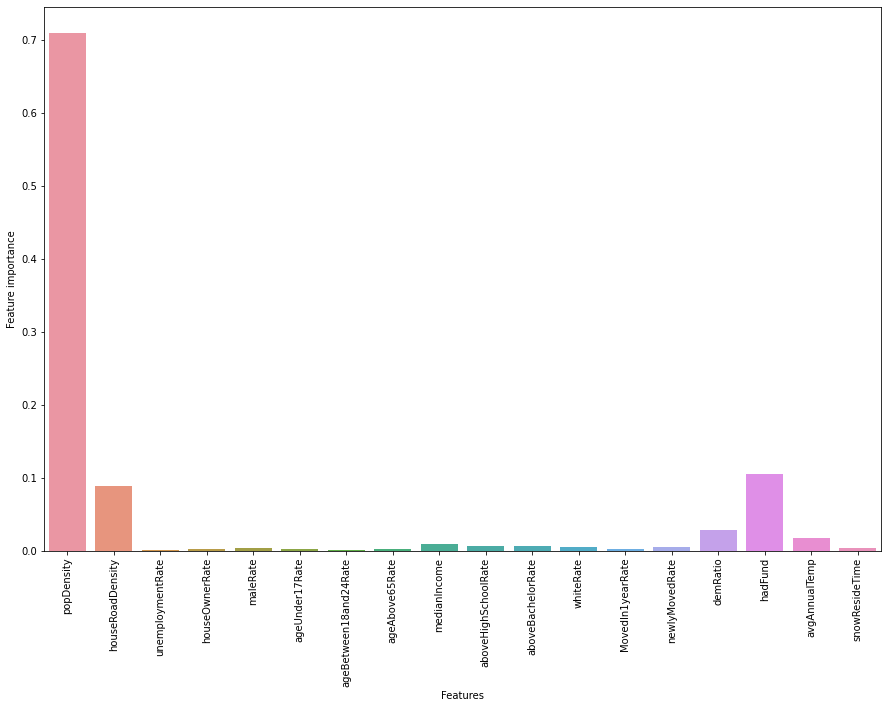

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
labels = X.columns.to_list()

p = sns.barplot(x=labels, y= model.feature_importances_.flatten());  # flatten() returns a copy of an array collapsed into one dimension.
p.set(xlabel = "Features", ylabel = "Feature importance");
p.tick_params(axis='x',rotation =90)

Try a smaller model with fewer predictors which have the most importance 

In [ ]:
y_new = data["deploymentRateDiff"]
X_new = data[['popDensity','houseRoadDensity','avgAnnualTemp','demRatio','hadFund']]

In [ ]:
cols_to_norm = X_new.columns
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

X_dev_new, X_test_new, y_dev_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=1000)
model.fit(X_dev_new,y_dev_new)

y_dev_pred_prune_new = model.predict(X_dev_new)
y_test_pred_prune_new = model.predict(X_test_new)

print("performance on development data")
print(model.score(X_dev_new,y_dev_new))

print("performance on test data")
print(model.score(X_test_new, y_test_new))

performance on development data
0.4275650281193797
performance on test data
0.41359645115287824
